<a href="https://colab.research.google.com/github/blingkey/self-study_ML-DeepLearning/blob/main/BreamAndSmelt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A생선이 도미인지 아닌지 판별
혼공머신 03-2 선형회귀(p130-149)  

**k-최근접 이웃 회귀**를 사용해서 농어의 무게를 예측했을 때 발생하는 **문제**  
train set 범위 밖의 샘플을 예측할 수 없다.  
∵ k-최근접 이웃 회귀는 아무리 멀리 떨어져 있더라도 무조건 가장 가까운 샘플의 타깃을 평균하여 예측  
∴ **선형 회귀(LinearRegression 클래스)** 사용하여 모델 훈련, 예측 

## 1. k-최근접 이웃의 한계

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [16]:
# 데이터를 train set과 test set으로 나눈다.
# 특성 데이터는 2차열 배열로 변환

from sklearn.model_selection import train_test_split

# train set과 test set으로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
 
# train set과 test set를 2차원 배열로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [17]:
# 최근접 이웃을 3개로 설정
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [18]:
# 위의 모델을 사용해 길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


모델은 50cm 농어의 무게를 1,033g 정도로 예측했다. 하지만 실제 농어의 무게는 훨씬 더 많이 나간다.  
문제가 생긴 이유는?

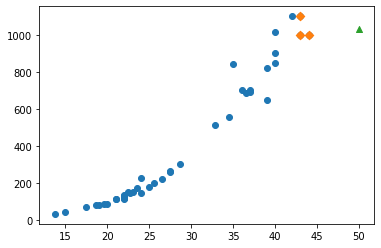

In [19]:
# train set과 50cm 농어의 최근접 이웃을 산점도에 표시
# k-최근접 이웃 모델의 kneighbors() 메서드를 사용하여 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻는다.

import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# train set의 산점도를 그린다.
plt.scatter(train_input, train_target)

# train set 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

길이가 50cm이고 무게가 1,033g인 농어는 '초록 삼각형'으로 표시되고 그 주변의 샘플은 '주황 다이아몬드'로 표시  
산점도를 보면 길이가 커질수록 농어의 무게가 증가하는 경향이 있다.  
50cm 농어에서 가장 가까운 것은 45cm 근방이므로 k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다.

In [20]:
# 이웃 샘플들의 타깃의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


모델이 예측했던 값과 정확하게 일치한다.  
k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다.  
따라서 새로운 샘플이 train set의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다.  
ex. 길이가 100cm인 농어도 여전히 1,033g으로 예측하는 오류를 범한다.

In [21]:
print(knr.predict([[100]]))

[1033.33333333]


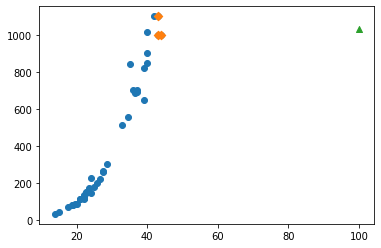

In [22]:
# 100cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[100]])

# train set의 산점도를 그린다
plt.scatter(train_input, train_target)

# train set 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.show()

이런 상황이라면 농어가 아무리 커도 무게가 더 늘어나지 않는다!  
k-최근접 이웃을 사용해 이 문제를 해결하려면 가장 큰 농어가 포함되도록 train set을 다시 만들어야 한다.

* 머신러닝 모델을 주기적으로 훈련해야 한다.  
머신러닝 모델은 한 번 만들고 끝나는 프로그램이 아니다.  
시간과 환경이 변화하면서 데이터도 바뀌기 때문에 주기적으로 새로운 훈련 데이터로 모델을 다시 훈련해야 한다.

## 2. 선형 회귀(liner regression)  
대표적인 회귀 알고리즘  
특성이 하나인 경우 어떤 직선을 학습하는 알고리즘  
(어떤 직선? 특성을 가장 잘 나타낼 수 있는 직선!)


### LinearRegression 클래스

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


k-최근접 이웃 회귀를 사용했을 때보다 선형 회귀가 무게를 아주 높게 예측했다.  
어떻게 이런 값이 나왔을까?

LinearRegression 클래스는 데이터에 가장 잘 맞는 a, b 값을 찾는다.  
LinearRegression 클래스가 찾은 a와 b는 lr 객체의 coef_와 intercept_속성에 저장되어 있다.  
기울기 = 계수(coefficient) = 가중치(weight)  
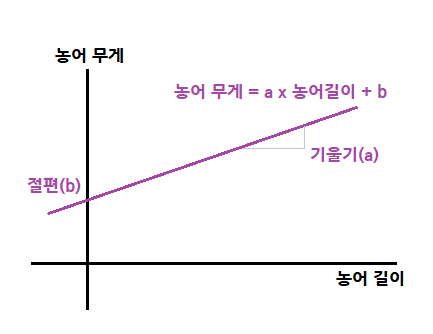

In [25]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


### **모델 파라미터(model parameter)**
coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 뜻으로 모델 파라미터라고 부른다.  
- **모델 기반 학습**  
머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다.  
- **사례 기반 학습**  
train set을 저장하는 것이 훈련의 전부인 경우

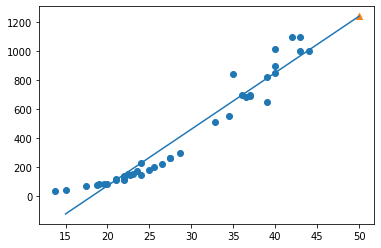

In [26]:
# train set의 산점도 그리기
plt.scatter(train_input, train_target)

# 농어의 길이 15에서 50까지 직선으로 그리기 
# (15, 15*39-709)와 (50, 50*39-709) 두 점을 잇는다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

위의 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선이다.  
길이가 50cm인 농어에 대한 예측은 직선의 연장선 상에 있다.

성공!

In [27]:
# test set, train set에 대한 R^2 점수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


train set 점수, test set 점수 전반적으로 낮은 점수  
그래프 왼쪽 아래를 보면 선형 회귀가 만든 직선이 왼쪽 아래로 쭉 뻗어 있다.  
(직선대로라면 농어의 무게가 0g 이하로 내려갈텐데 현실에선 있을 수 없는 일)  
⇒ 과소적합

## 3. 다항 회귀(polynomial regression) 
다항식을 사용한 선형 회귀



농어의 길이와 무게에 대한 산점도를 자세히 보면 일직선이라기보단 곡선에 가깝니다.  
**2차 방정식의 그래프**를 그리려면 **제곱한 항**이 **train set에 추가**되어야 한다.  
- **column_stack()** 함수  
2차 방정식 그래프 그리기위해 농어의 길이를 제곱해서 **원래 데이터 앞에 붙인다.**

In [28]:
# train_input 제곱한 것과 train_input 두 배열을 나란히 붙인다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [29]:
# 데이터셋의 크기 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에 train set과 test set 모두 열이 2개로 늘어났다.

2차 방정식 그래프를 찾기 위해 train set에 제곱 항을 추가  
※ 타깃 값은 그대로 사용!

In [30]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [31]:
# 모델이 훈련한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


이 모델은 다음과 같은 그래프를 학습했다.  
무게 = 1.01 x 길이^2 - 21.6 x 길이 + 116.05  

⁕ "길이^2"가 있다고 해서 비선형인가?  
길이^2를 다른 변수로 치환(길이^2=왕길이)해서 본다면 무게는 왕길이와 길이의 선형 관계로 표현할 수 있다.

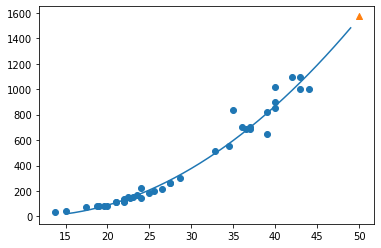

In [32]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

In [33]:
# train set과 test set의 R^2 점수 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


전반적으로 점수가 높아졌지만 여전히 test set > train set  
⇒ 과소적합 문제 미해결